## Word Embeddings

#### 1. Define Model

In [1]:
from openai import AzureOpenAI
import os

base_url = "https://aoai719xyz01.openai.azure.com/"
api_version = "2023-07-01-preview"
api_key = os.environ.get("OPENAI_API_KEY")
deployment_name = "textembeddingada-002" # change to your deployment name

client = AzureOpenAI(api_key=api_key, api_version=api_version, azure_endpoint=base_url)

#### 2. Load Data and Generate Embeddings

In [2]:
import pandas as pd

df = pd.read_csv("data/bbc-news-data.csv", delimiter='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [21]:
def generate_embedding(input):
    response = client.embeddings.create(
        input=input,
        model=deployment_name
    )

    return response.data[0].embedding

# example embedding for content of first document
print(generate_embedding(df.iloc[0].content))

[-0.021155867725610733, -0.01682022027671337, -0.0025922467466443777, -0.043539296835660934, 0.017695186659693718, -0.0014340609777718782, 0.006856068503111601, -0.01945817470550537, -0.011812026612460613, -0.03350985050201416, 0.01847873628139496, 0.04518475383520126, 0.01440427266061306, 0.008821474388241768, 0.01497887633740902, 0.0079530393704772, 0.014796048402786255, -0.005138786509633064, 0.023689348250627518, -0.032830771058797836, 0.0005831738817505538, 0.007633089553564787, -0.03907306119799614, 0.01675492525100708, -0.009650732390582561, -0.005713390186429024, 0.0011932823108509183, -0.0006851987564004958, 0.03727089241147041, -0.018517913296818733, 0.006647121626883745, -0.004058139398694038, -0.021848004311323166, 0.011498605832457542, -0.02987939864397049, 0.0013336684787645936, -0.0009606657549738884, 0.002990551758557558, 0.038106679916381836, -0.002799561247229576, 0.01689857617020607, 0.017225055024027824, -0.0036565696354955435, 0.010904413647949696, -0.0464123189449

In [64]:
# generate embeddings for all documents
df_subset = df.sample(800)
df_subset["embedding"] = df_subset.apply(lambda x: generate_embedding(x.content), axis=1)

In [65]:
df_subset.head(10)

,category,filename,title,content,embedding
91,business,092.txt,Iranian MPs threaten mobile deal,Turkey's biggest private mobile firm could ba...,"[-0.01323742140084505, -0.0179674681276083, 0...."
1399,sport,087.txt,GB quartet get cross country call,Four British athletes have been pre-selected ...,"[-0.007157313171774149, 0.005875015631318092, ..."
2017,tech,194.txt,Swap offer for pirated Windows XP,Computer giant Microsoft has launched a pilot...,"[-4.04125421482604e-05, -0.015075226314365864,..."
956,politics,061.txt,Assembly ballot papers 'missing',Hundreds of ballot papers for the regional as...,"[-0.020177526399493217, 0.012909485027194023, ..."
1544,sport,232.txt,Wolves appoint Hoddle as manager,Glenn Hoddle has been unveiled as the new Wol...,"[-0.00883761327713728, 0.002602080814540386, -..."
1837,tech,014.txt,EU software patent law faces axe,The European Parliament has thrown out a bill...,"[0.0023491098545491695, -0.002857474610209465,..."
1310,politics,415.txt,Labour MP praises Tory campaign,"The Conservatives have been ""a lot smarter"" i...","[-0.02651878073811531, -0.0166950486600399, 0...."
266,business,267.txt,Nasdaq planning $100m share sale,The owner of the technology-dominated Nasdaq ...,"[-0.01835239864885807, -0.01645200327038765, 0..."
94,business,095.txt,Profits slide at India's Dr Reddy,Profits at Indian drugmaker Dr Reddy's fell 9...,"[-0.027344241738319397, -0.016613882035017014,..."
554,entertainment,045.txt,Jugnot 'tops French actor league',Actor Gerard Jugnot - star of the Oscar-nomin...,"[-0.025035807862877846, -0.00464188726618886, ..."


In [66]:
# write to file
df_subset.to_csv("data/bbc-news-data-embeddings.csv", index=False)

#### 3. Visualise embeddings

In [79]:
# Read data
df_subset = pd.read_csv("data/bbc-news-data-embeddings.csv")
df_subset["embedding"] = df_subset.embedding.apply(eval).apply(np.array)
df_subset.head()

,category,filename,title,content,embedding
0,business,092.txt,Iranian MPs threaten mobile deal,Turkey's biggest private mobile firm could ba...,"[-0.01323742140084505, -0.0179674681276083, 0...."
1,sport,087.txt,GB quartet get cross country call,Four British athletes have been pre-selected ...,"[-0.007157313171774149, 0.005875015631318092, ..."
2,tech,194.txt,Swap offer for pirated Windows XP,Computer giant Microsoft has launched a pilot...,"[-4.04125421482604e-05, -0.015075226314365864,..."
3,politics,061.txt,Assembly ballot papers 'missing',Hundreds of ballot papers for the regional as...,"[-0.020177526399493217, 0.012909485027194023, ..."
4,sport,232.txt,Wolves appoint Hoddle as manager,Glenn Hoddle has been unveiled as the new Wol...,"[-0.00883761327713728, 0.002602080814540386, -..."


In [80]:
# Reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
dims_pca = pca.fit_transform(df_subset.embedding.to_list())
print("shape=", dims_pca.shape)
print(dims_pca)

shape= (800, 3)
[[-0.09785521  0.00958861  0.04444691]
 [ 0.18552473 -0.08999725  0.03562741]
 [-0.16385976  0.02569954 -0.13817025]
 ...
 [ 0.08236388  0.0405102   0.07060051]
 [ 0.00797144  0.12116544 -0.01017588]
 [-0.18992126 -0.09837332  0.17211103]]


In [69]:
df_subset["pca3"] = dims_pca.tolist()
df_subset.head()

,category,filename,title,content,embedding,pca3
0,business,092.txt,Iranian MPs threaten mobile deal,Turkey's biggest private mobile firm could ba...,"[-0.01323742140084505, -0.0179674681276083, 0....","[-0.0978552838165885, 0.009589684834732527, 0...."
1,sport,087.txt,GB quartet get cross country call,Four British athletes have been pre-selected ...,"[-0.007157313171774149, 0.005875015631318092, ...","[0.18552468536391262, -0.09000073273965681, 0...."
2,tech,194.txt,Swap offer for pirated Windows XP,Computer giant Microsoft has launched a pilot...,"[-4.04125421482604e-05, -0.015075226314365864,...","[-0.16385984369001402, 0.025699349250280994, -..."
3,politics,061.txt,Assembly ballot papers 'missing',Hundreds of ballot papers for the regional as...,"[-0.020177526399493217, 0.012909485027194023, ...","[0.011425530420036373, 0.10066630098820141, -0..."
4,sport,232.txt,Wolves appoint Hoddle as manager,Glenn Hoddle has been unveiled as the new Wol...,"[-0.00883761327713728, 0.002602080814540386, -...","[0.18582282582719803, 0.01613651236786173, 0.0..."


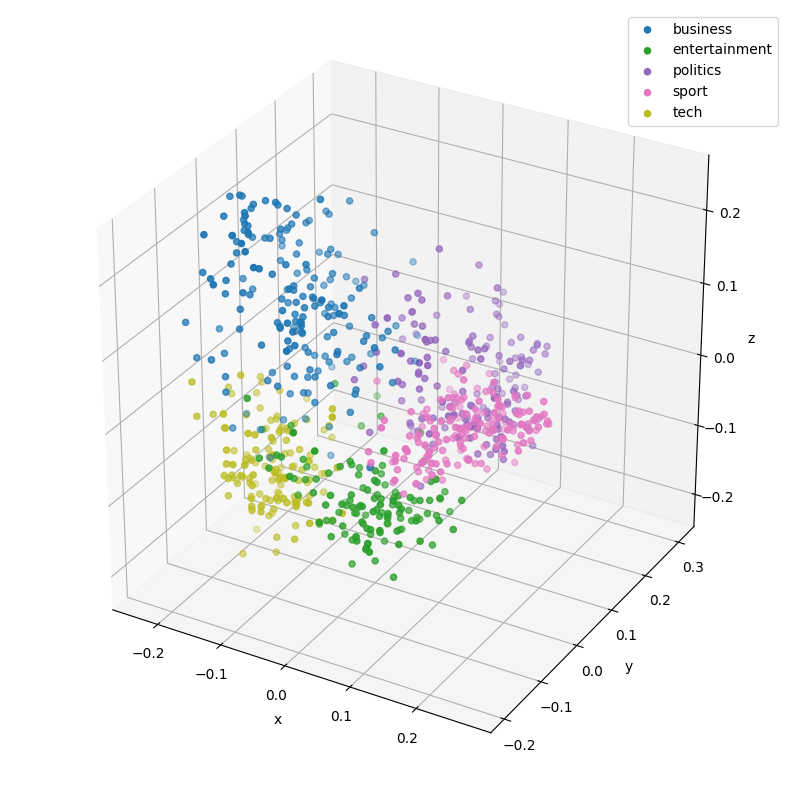

In [70]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
cmap = plt.get_cmap("tab20")

categories = sorted(df_subset.category.unique())

# Plot each sample category individually
for i, cat in enumerate(categories):
    sub_matrix = np.array(df_subset[df_subset["category"] == cat]["pca3"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    _ = ax.scatter(x, y, zs=z, zdir="z", c=colors, label=cat)

_ = ax.set_xlabel("x")
_ = ax.set_ylabel("y")
_ = ax.set_zlabel("z")
_ = ax.legend()

#### 4. Cosine Similarity

In [132]:
# Get the first item's embedding as a numpy array
first_item = df_subset.iloc[0]["embedding"]

# Define a function to calculate the cosine similarity between two numpy arrays
def cosine_similarity(a, b):
    # Use the dot product and the norm of the vectors to compute the cosine similarity
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Create an empty list to store the cosine similarities
cosine_similarities = []

# Loop through the dataframe and calculate the cosine similarity with the first item
for i, row in df_subset.iterrows():
    # Get the current item's embedding as a numpy array
    current_item = row["embedding"]
    # Calculate the cosine similarity and append it to the list
    cosine_similarities.append(cosine_similarity(first_item, current_item))

# Add a new column to the dataframe with the cosine similarities
df_subset["cosine_similarity"] = cosine_similarities

# Print the updated dataframe
df_subset[["category", "cosine_similarity"]].head(20).sort_values(by="cosine_similarity")

,category,cosine_similarity
4,sport,0.693435
1,sport,0.702171
12,entertainment,0.706661
16,sport,0.712492
3,politics,0.712811
19,sport,0.713470
9,entertainment,0.723133
15,politics,0.724841
2,tech,0.736297
11,business,0.737791
